In [129]:
import sys
sys.path.append('../')

import cqt
import cqt.datagen as dg
import cqt.model.asset_model as md
import cqt.model.asset_model_component_spot as comp_spot
import pandas as pd
import numpy as np

from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from matplotlib import pyplot

import tensorflow as tf

In [28]:
df_btc_1h = pd.read_csv('..\data\csv\coinapi_ohlcv_GEMINI_SPOT_BTC_USD_1HRS_data.csv')
df_eth_1h = pd.read_csv('..\data\csv\coinapi_ohlcv_GEMINI_SPOT_ETH_USD_1HRS_data.csv')

In [29]:
print(df_btc_1h)

      Unnamed: 0  price_close  price_open  price_high  price_low  \
0              0      4603.00     4431.66     4705.07    4431.65   
1              1      4559.99     4603.00     4625.71    4555.93   
2              2      4588.50     4559.99     4611.00    4559.98   
3              3      4555.01     4588.25     4588.25    4555.01   
4              4      4556.65     4555.02     4556.72    4531.00   
5              5      4568.92     4553.52     4579.99    4553.51   
6              6      4584.36     4568.01     4584.87    4560.72   
7              7      4586.99     4584.86     4607.70    4584.86   
8              8      4610.98     4599.96     4626.00    4591.98   
9              9      4589.99     4607.82     4607.82    4582.11   
10            10      4591.38     4589.99     4603.94    4589.99   
11            11      4595.67     4590.00     4595.68    4571.03   
12            12      4608.62     4595.68     4625.37    4595.67   
13            13      4600.00     4608.62     46

In [30]:
df_eth_1h['price_mid'] = (df_eth_1h['price_high'] + df_eth_1h['price_low'])/2
df_btc_1h['price_mid'] = (df_btc_1h['price_high'] + df_btc_1h['price_low'])/2

In [31]:
df_eth_1h.head()

,Unnamed: 0,price_close,price_open,price_high,price_low,time_close,time_open,trades_count,volume_traded,request_type,symbol_id,period_id,time_start,limit,price_mid
0,0,367.35,360.99,370.03,360.53,2017-08-29T14:00:00.0000000Z,2017-08-29T13:00:00.0000000Z,780,8029.411499,ohlcv,GEMINI_SPOT_ETH_USD,1HRS,2017-08-29T10:23:14,100000,365.280
1,1,364.19,367.36,367.36,362.76,2017-08-29T15:00:00.0000000Z,2017-08-29T14:00:00.0000000Z,706,9545.482957,ohlcv,GEMINI_SPOT_ETH_USD,1HRS,2017-08-29T10:23:14,100000,365.060
2,2,366.68,364.19,366.84,364.17,2017-08-29T16:00:00.0000000Z,2017-08-29T15:00:00.0000000Z,606,5775.876152,ohlcv,GEMINI_SPOT_ETH_USD,1HRS,2017-08-29T10:23:14,100000,365.505
3,3,370.92,366.50,371.00,366.00,2017-08-29T17:00:00.0000000Z,2017-08-29T16:00:00.0000000Z,479,5106.570290,ohlcv,GEMINI_SPOT_ETH_USD,1HRS,2017-08-29T10:23:14,100000,368.500
4,4,372.71,370.84,373.90,369.08,2017-08-29T18:00:00.0000000Z,2017-08-29T17:00:00.0000000Z,781,8886.584629,ohlcv,GEMINI_SPOT_ETH_USD,1HRS,2017-08-29T10:23:14,100000,371.490


In [32]:
df_eth_1h['hr_return'] = df_eth_1h['price_mid'].shift(1) / df_eth_1h['price_mid'] - 1
df_btc_1h['hr_return'] = df_btc_1h['price_mid'].shift(1) / df_btc_1h['price_mid'] - 1

df_eth_1h['range_open'] = df_eth_1h['price_open'] / df_eth_1h['price_mid'] - 1
df_btc_1h['range_open'] = df_btc_1h['price_open'] / df_btc_1h['price_mid'] - 1

df_eth_1h['range_close'] = df_eth_1h['price_close'] / df_eth_1h['price_mid'] - 1
df_btc_1h['range_close'] = df_btc_1h['price_close'] / df_btc_1h['price_mid'] - 1

df_eth_1h['range_high'] = df_eth_1h['price_high'] / df_eth_1h['price_mid'] - 1
df_btc_1h['range_high'] = df_btc_1h['price_high'] / df_btc_1h['price_mid'] - 1

df_eth_1h['range_low'] = df_eth_1h['price_low'] / df_eth_1h['price_mid'] - 1
df_btc_1h['range_low'] = df_btc_1h['price_low'] / df_btc_1h['price_mid'] - 1

In [33]:
df_eth_1h = df_eth_1h.fillna(0)
df_btc_1h = df_btc_1h.fillna(0)

In [243]:
#eth = df_eth_1h[['hr_return', 'range_open', 'range_close', 'range_high', 'range_low', 'trades_count', 'volume_traded']]
eth = df_eth_1h[['hr_return']]

In [244]:
#btc = df_btc_1h[['hr_return', 'range_open', 'range_close', 'range_high', 'range_low', 'trades_count', 'volume_traded']]
btc = df_btc_1h[['hr_return']]

In [245]:
eth.head()

,hr_return
0,0.000000
1,0.000603
2,-0.001217
3,-0.008128
4,-0.008049


In [246]:
btc = btc.assign(hr_return_1 = lambda x:btc.hr_return.shift(1))
btc = btc.assign(hr_return_2 = lambda x:btc.hr_return.shift(2))
#btc = btc.assign(future = lambda x:(btc.index > 2427)*1)
btc = btc.fillna(0)

eth = eth.assign(hr_return_1 = lambda x:eth.hr_return.shift(1))
eth = eth.assign(hr_return_2 = lambda x:eth.hr_return.shift(2))
#eth = eth.assign(future = lambda x:(eth.index > 2427)*1)
eth = eth.fillna(0)


#eth_y = pd.DataFrame()
#btc_y = pd.DataFrame()

#eth_y = ((eth.hr_return > 0) & (eth.hr_return.shift(-1) > 0)) * 1 + ((eth.hr_return < 0) & (eth.hr_return.shift(-1) < 0)) * -1
#btc_y = ((btc.hr_return > 0) & (btc.hr_return.shift(-1) > 0)) * 1 + ((btc.hr_return < 0) & (btc.hr_return.shift(-1) < 0)) * -1

# #btc = btc.assign(hr_return_1 = lambda x:btc.hr_return.shift(1))
# #btc = btc.assign(hr_return_2 = lambda x:btc.hr_return.shift(2))
# btc = btc.fillna(0)

# #eth = eth.assign(hr_return_1 = lambda x:eth.hr_return.shift(1))
# #eth = eth.assign(hr_return_2 = lambda x:eth.hr_return.shift(2))
# eth = eth.fillna(0)


# #eth_y = pd.DataFrame()
# #btc_y = pd.DataFrame()

eth_y = ((eth.hr_return.shift(-1) > 0)) * 1
btc_y = ((btc.hr_return.shift(-1) > 0)) * 1


In [247]:
print(btc, btc_y)

      hr_return  hr_return_1  hr_return_2
0      0.000000     0.000000     0.000000
1     -0.004892     0.000000     0.000000
2      0.001162    -0.004892     0.000000
3      0.003032     0.001162    -0.004892
4      0.006112     0.003032     0.001162
5     -0.005012     0.006112     0.003032
6     -0.001322    -0.005012     0.006112
7     -0.005110    -0.001322    -0.005012
8     -0.002758    -0.005110    -0.001322
9      0.003052    -0.002758    -0.005110
10    -0.000435     0.003052    -0.002758
11     0.002969    -0.000435     0.003052
12    -0.005892     0.002969    -0.000435
13     0.000621    -0.005892     0.002969
14     0.001616     0.000621    -0.005892
15    -0.002787     0.001616     0.000621
16     0.001142    -0.002787     0.001616
17    -0.004383     0.001142    -0.002787
18     0.007130    -0.004383     0.001142
19     0.002894     0.007130    -0.004383
20     0.005122     0.002894     0.007130
21     0.008509     0.005122     0.002894
22    -0.005203     0.008509     0

In [256]:
seed = 5
np.random.seed(seed)
tf.set_random_seed(seed)

X = btc.values
y = btc_y.values
train_ratio = 0.9

# set replace=False, Avoid double sampling
train_index = np.random.choice(len(X), round(len(X) * train_ratio), replace=False)

# diff set
test_index = np.array(list(set(range(len(X))) - set(train_index)))
train_X = X[train_index]
train_y = y[train_index]
test_X = X[test_index]
test_y = y[test_index]

In [257]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(5190, 3) (5190,) (577, 3) (577,)


In [258]:
# Parameters
learning_rate = 0.1
iter_num = 1000
batch_size = 100
display_step = 1
features = train_X.shape[1]

In [259]:
# Set model weights
W = tf.Variable(tf.zeros([features, 1]))
b = tf.Variable(tf.zeros([1, 1]))
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# tf Graph Input
data = tf.placeholder(tf.float32, [None, features]) # mnist data image of shape 28*28=784
target = tf.placeholder(tf.float32, [None, 1]) # 0-9 digits recognition => 10 classes

# Declare the model you need to learn
mod = tf.matmul(data, W) + b

# Declare loss function
# Use the sigmoid cross-entropy loss function,
# first doing a sigmoid on the model result and then using the cross-entropy loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=mod, labels=target))

# Define the optimizer
opt = tf.train.GradientDescentOptimizer(learning_rate)

# Define the goal
goal = opt.minimize(loss)

# Define the accuracy
# The default threshold is 0.5, rounded off directly
prediction = tf.round(tf.sigmoid(mod))

# Bool into float32 type
correct = tf.cast(tf.equal(prediction, target), dtype=tf.float32)

# Average
accuracy = tf.reduce_mean(correct)

# End of the definition of the model framework

In [261]:
# Start training model
# Define the variable that stores the result
loss_trace = []
train_acc = []
test_acc = []

# training model
for epoch in range(iter_num):
    # Generate random batch index
    batch_index = np.random.choice(len(train_X), size=batch_size)
    batch_train_X = train_X[batch_index]
    batch_train_y = np.matrix(train_y[batch_index]).T
    sess.run(goal, feed_dict={data: batch_train_X, target: batch_train_y})
    temp_loss = sess.run(loss, feed_dict={data: batch_train_X, target: batch_train_y})
    # convert into a matrix, and the shape of the placeholder to correspond
    temp_train_acc = sess.run(accuracy, feed_dict={data: train_X, target: np.matrix(train_y).T})
    temp_test_acc = sess.run(accuracy, feed_dict={data: test_X, target: np.matrix(test_y).T})
    # recode the result
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    # output
    if (epoch + 1) % 20 == 0:
        print('epoch: {:4d} loss: {:5f} train_acc: {:5f} test_acc: {:5f}'.format(epoch + 1, temp_loss,
                                                                          temp_train_acc, temp_test_acc))



epoch:   20 loss: 0.697811 train_acc: 0.523121 test_acc: 0.506066
epoch:   40 loss: 0.688131 train_acc: 0.523121 test_acc: 0.506066
epoch:   60 loss: 0.690782 train_acc: 0.523121 test_acc: 0.506066
epoch:   80 loss: 0.694791 train_acc: 0.523121 test_acc: 0.506066
epoch:  100 loss: 0.684740 train_acc: 0.523121 test_acc: 0.506066
epoch:  120 loss: 0.694988 train_acc: 0.523121 test_acc: 0.506066
epoch:  140 loss: 0.690742 train_acc: 0.523121 test_acc: 0.506066
epoch:  160 loss: 0.694891 train_acc: 0.523121 test_acc: 0.506066
epoch:  180 loss: 0.692842 train_acc: 0.523121 test_acc: 0.506066
epoch:  200 loss: 0.687859 train_acc: 0.523121 test_acc: 0.506066
epoch:  220 loss: 0.682439 train_acc: 0.523121 test_acc: 0.506066
epoch:  240 loss: 0.694170 train_acc: 0.523121 test_acc: 0.506066
epoch:  260 loss: 0.699276 train_acc: 0.523121 test_acc: 0.506066
epoch:  280 loss: 0.694709 train_acc: 0.523121 test_acc: 0.506066
epoch:  300 loss: 0.689587 train_acc: 0.523121 test_acc: 0.506066
epoch:  32

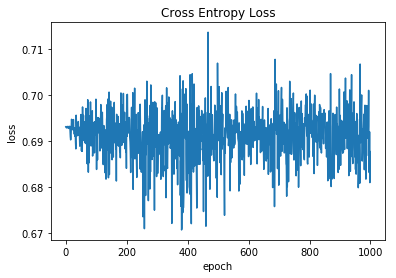

In [237]:
# Visualization of the results
# loss function
plt.plot(loss_trace)
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

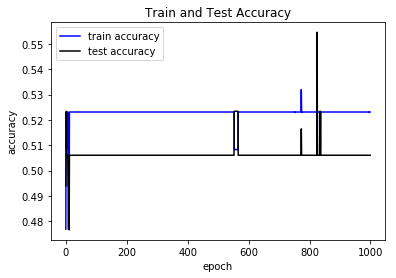

In [238]:
# accuracy
plt.plot(train_acc, 'b-', label='train accuracy')
plt.plot(test_acc, 'k-', label='test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Train and Test Accuracy')
plt.legend(loc='best')
plt.show()

In [264]:
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

logisticRegr.fit(train_X, train_y)

# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(test_X)
# Use score method to get accuracy of model
score = logisticRegr.score(test_X, test_y)
print(score)

0.512998266897747
